In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.9.2


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


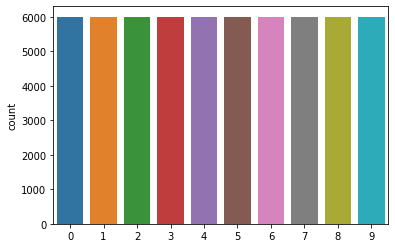

In [ ]:
sns.countplot(y_train)

In [ ]:
np.isnan(x_train).any()
np.isnan(x_test).any()

False

In [ ]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


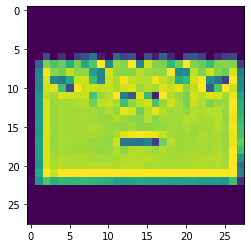

In [ ]:
from random import randrange

size = len(x_train)
random = randrange(size)

plt.imshow(x_train[random][:,:,0])
print(y_train[random])

In [ ]:
batch_size = 64
num_classes = 10
epochs = 10

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/10
844/844 [==============================] - 370s 436ms/step - loss: 0.5269 - acc: 0.8132 - val_loss: 0.3112 - val_acc: 0.8833
Epoch 2/10
844/844 [==============================] - 369s 437ms/step - loss: 0.3341 - acc: 0.8814 - val_loss: 0.2866 - val_acc: 0.8967
Epoch 3/10
844/844 [==============================] - 356s 422ms/step - loss: 0.2989 - acc: 0.8945 - val_loss: 0.2920 - val_acc: 0.9018
Epoch 4/10
844/844 [==============================] - 359s 425ms/step - loss: 0.2815 - acc: 0.9016 - val_loss: 0.2880 - val_acc: 0.8968
Epoch 5/10
844/844 [==============================] - 357s 423ms/step - loss: 0.2732 - acc: 0.9046 - val_loss: 0.2460 - val_acc: 0.9142
Epoch 6/10
844/844 [==============================] - 356s 422ms/step - loss: 0.2718 - acc: 0.9064 - val_loss: 0.2308 - val_acc: 0.9183
Epoch 7/10
844/844 [==============================] - 355s 421ms/step - loss: 0.2705 - acc: 0.9063 - val_loss: 0.2531 - val_acc: 0.9112
Epoch 8/10
844/844 [============================

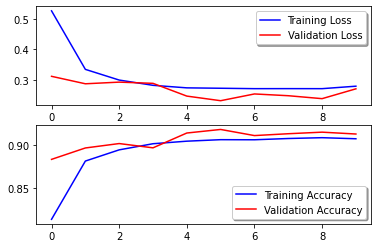

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 14s 45ms/step - loss: 0.2815 - acc: 0.9088


In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 15s 47ms/step


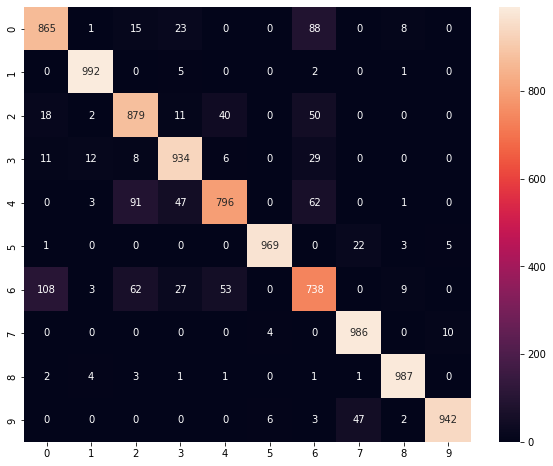

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')